**Linear Regression** cannot be used for **yes/no** type of outcomes since the output of LR can be over 1 or even negative. To avoid this, we use the **sigmoid function**, which is a smooth function that has values between 0 and 1, and is used to represent probabilities.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')

# Select features and target variable
X = df.iloc[:, 2:4]  # Selecting columns 2 and 3 for features
Y = df.iloc[:, 4]    # Selecting column 4 for the target variable

# Display the first few rows of the dataframe
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# Import necessary library
from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")


Training set shape: X_train: (300, 2), Y_train: (300,)
Testing set shape: X_test: (100, 2), Y_test: (100,)


In [6]:
# Import necessary library
from sklearn.preprocessing import StandardScaler 

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data
print("First few rows of the scaled training data:")
print(X_train_scaled[:5])


First few rows of the scaled training data:
[[ 1.8925893   1.52189404]
 [ 0.1250379   0.03213212]
 [ 0.9106163  -1.31157471]
 [-1.34792161 -1.48684082]
 [-0.169554   -0.58129926]]


In [10]:
# Import necessary library
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
clf = LogisticRegression(random_state=0)

# Fit the model to the training data
clf.fit(X_train_scaled, Y_train)

# Display the model's parameters
print("Model parameters:")
print(clf.get_params())

# Predict the target values for the test set
Y_pred = clf.predict(X_test_scaled)

# Display the first few predictions
print("First few predictions:")
print(Y_pred[:5])


Model parameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
First few predictions:
[0 1 0 1 0]


In [12]:
# Import necessary library
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[61  2]
 [12 25]]


C:\Users\men_l\AppData\Local\Temp\ipykernel_36756\272422428.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


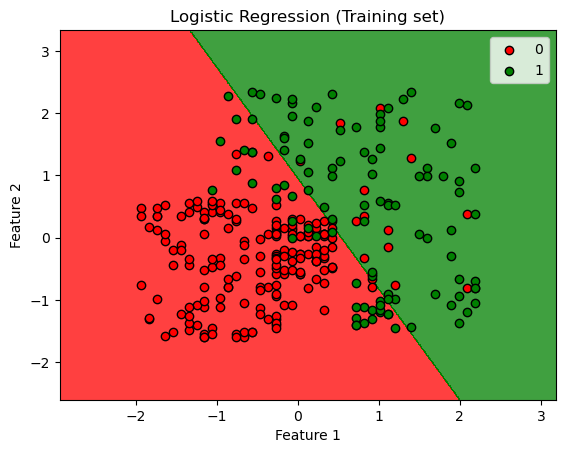

Model accuracy on test set: 0.86


In [14]:
# Import necessary libraries
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Set the data for plotting
X_set, Y_set = X_train_scaled, Y_train

# Generate a grid of points with a distance of 0.01 between them
x1, x2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Classify each point in the grid
Z = clf.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

# Plot the decision boundary
plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot the points
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j, edgecolor='black')

# Set plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Add legend and labels
plt.legend()
plt.title('Logistic Regression (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

# Evaluate the model on the test set
score = clf.score(X_test_scaled, Y_test)
print(f"Model accuracy on test set: {score:.2f}")
